In [1]:
from interpret.glassbox import ExplainableBoostingRegressor as ebr
from interpret import show
import numpy as np

In [2]:
# Load data and fit EBM.
from sklearn.datasets import load_diabetes
X, Y = load_diabetes(return_X_y=True, as_frame=True)
Y /= np.std(Y)

ebm = ebr(interactions=2)
ebm.fit(X, Y)
ebm_global = ebm.explain_global()

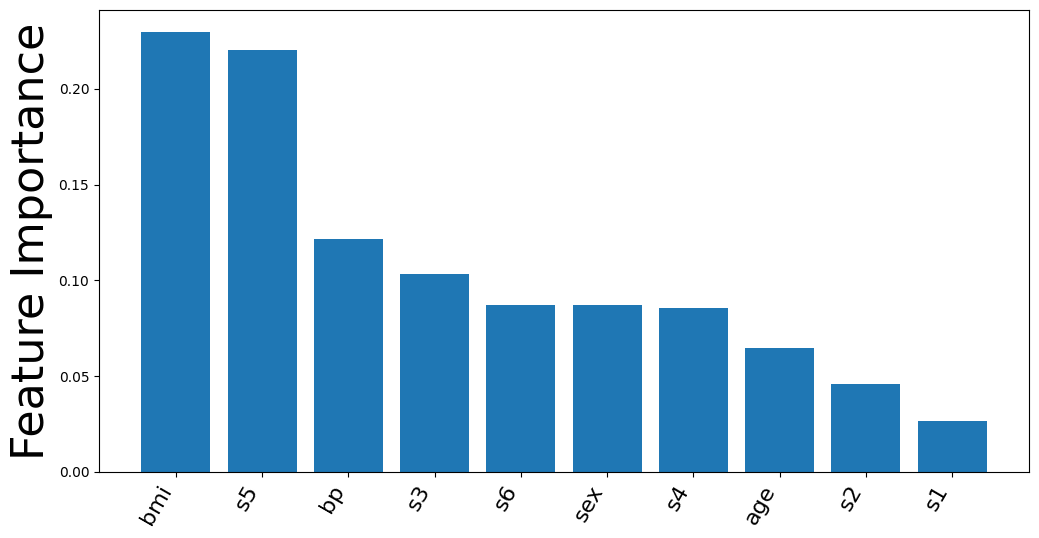

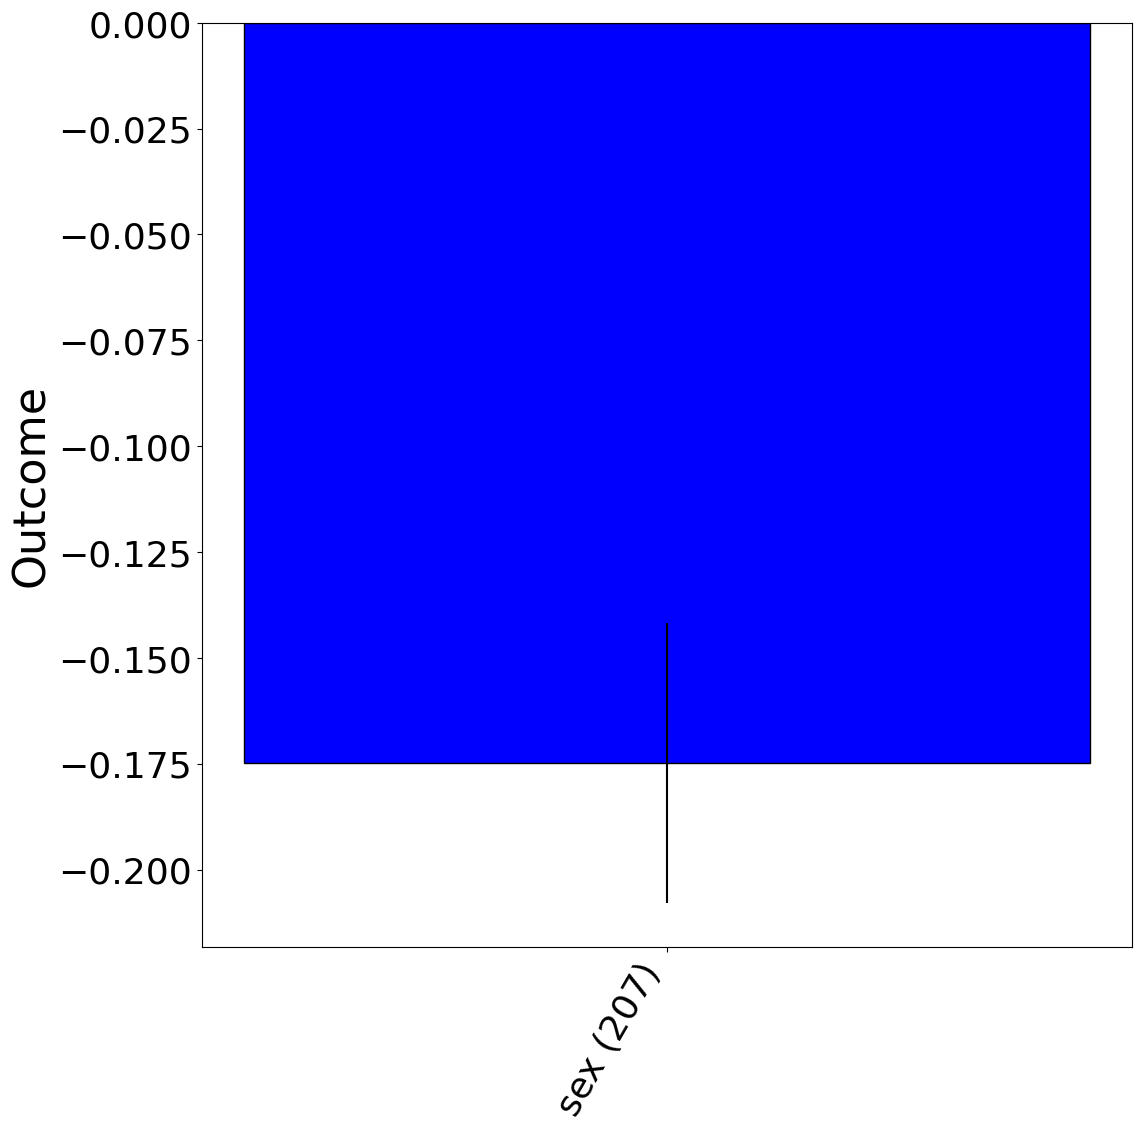

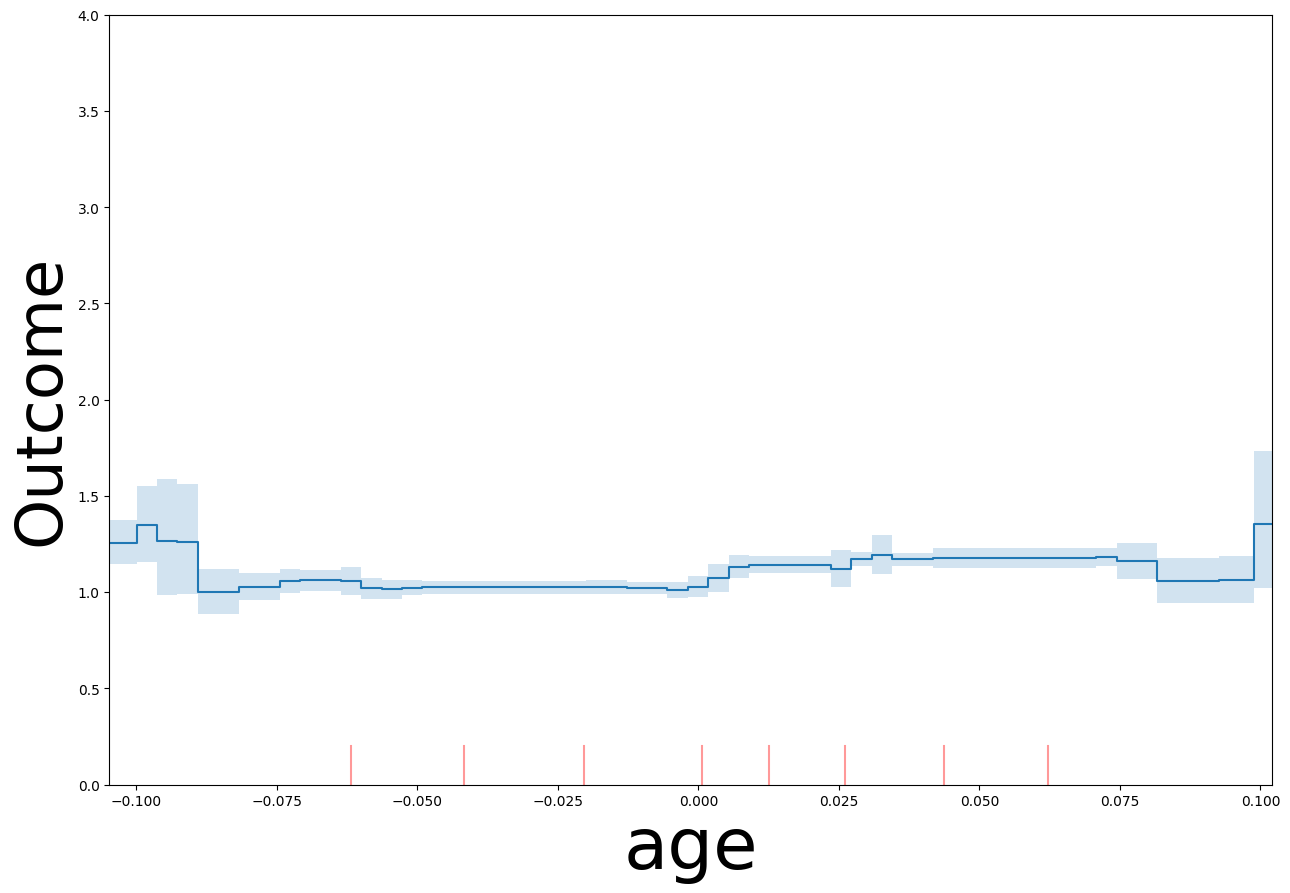

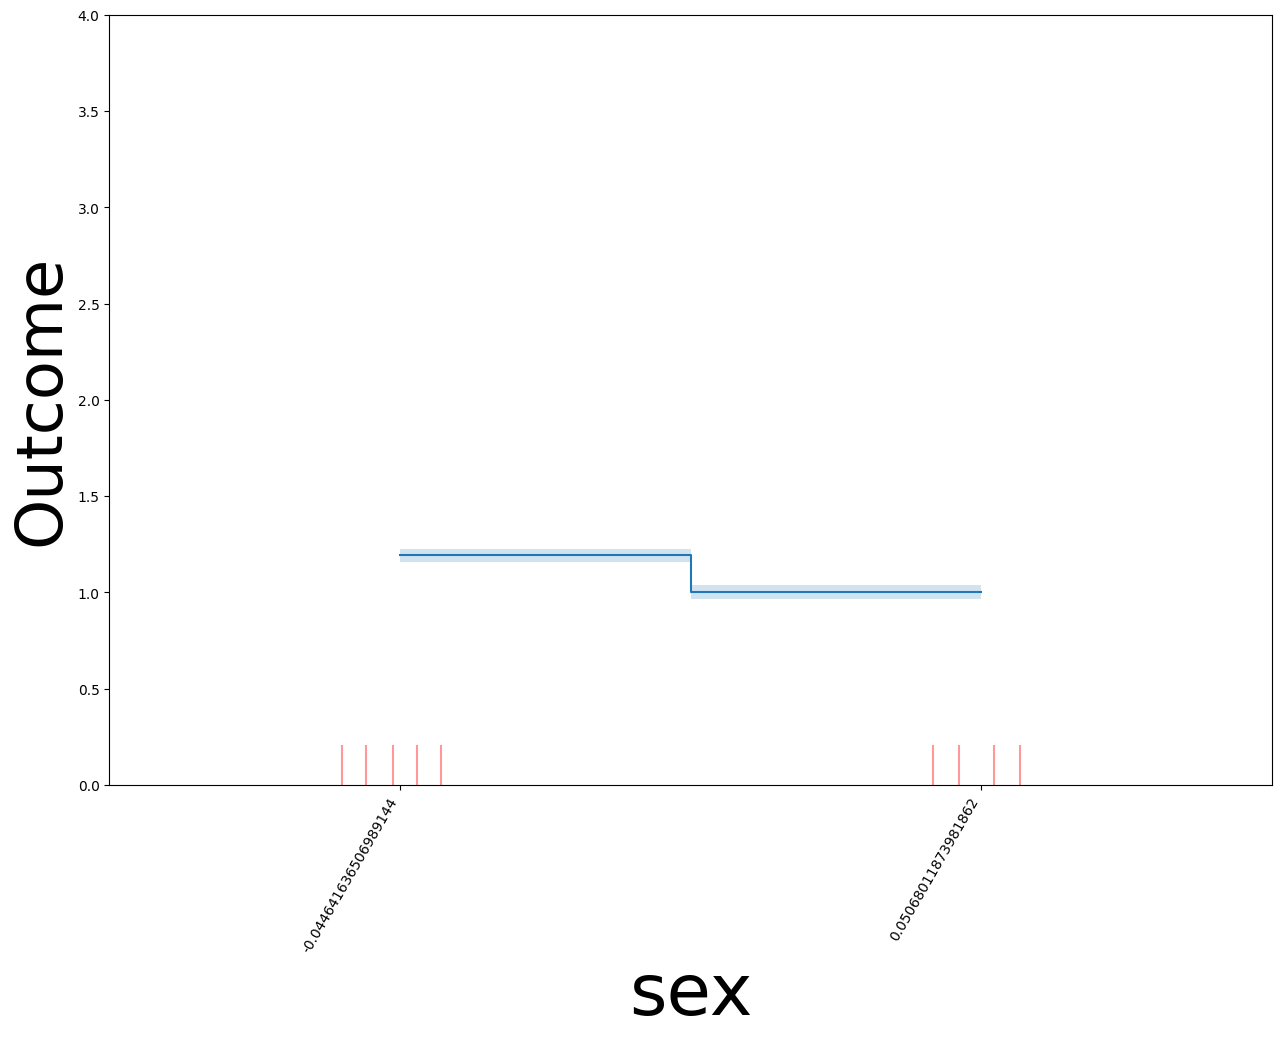

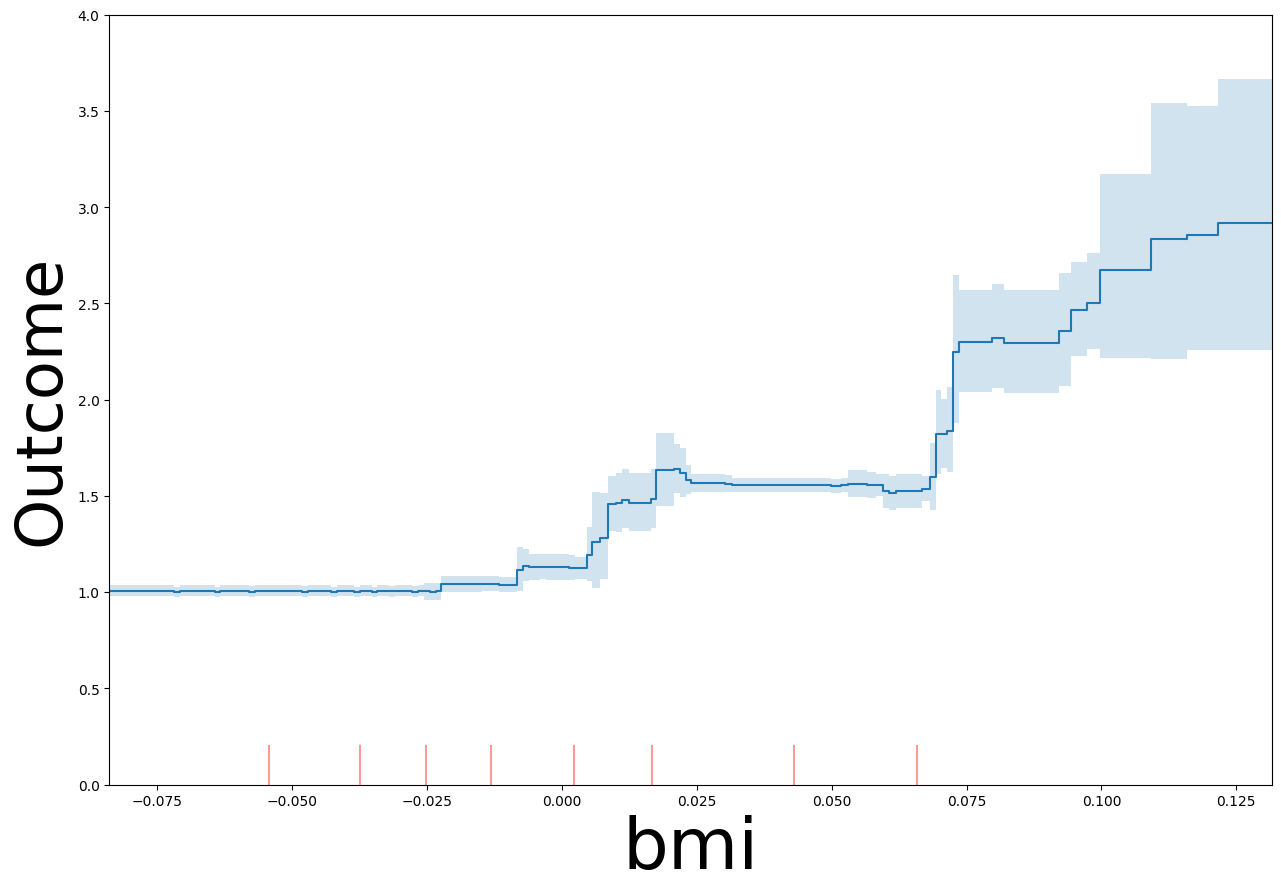

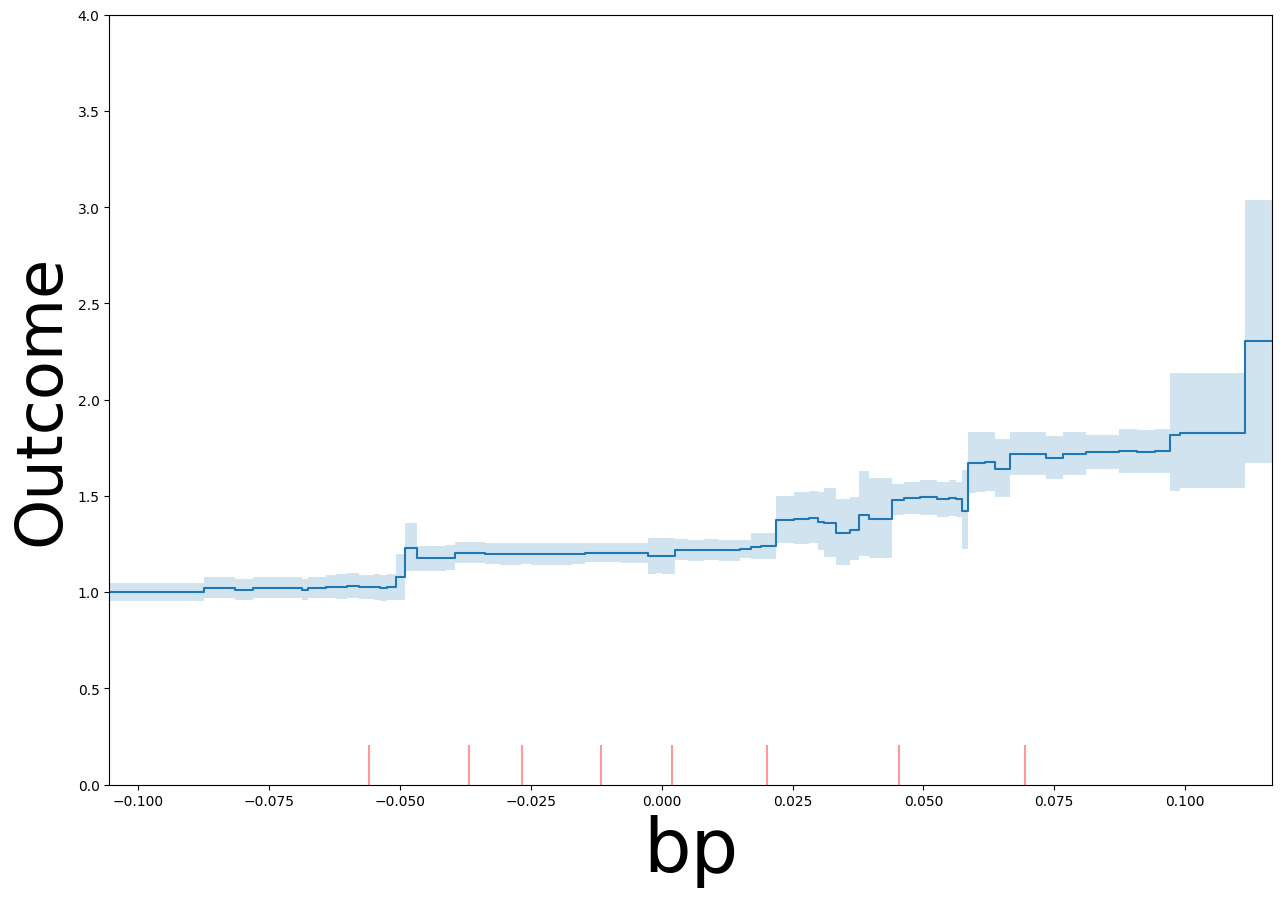

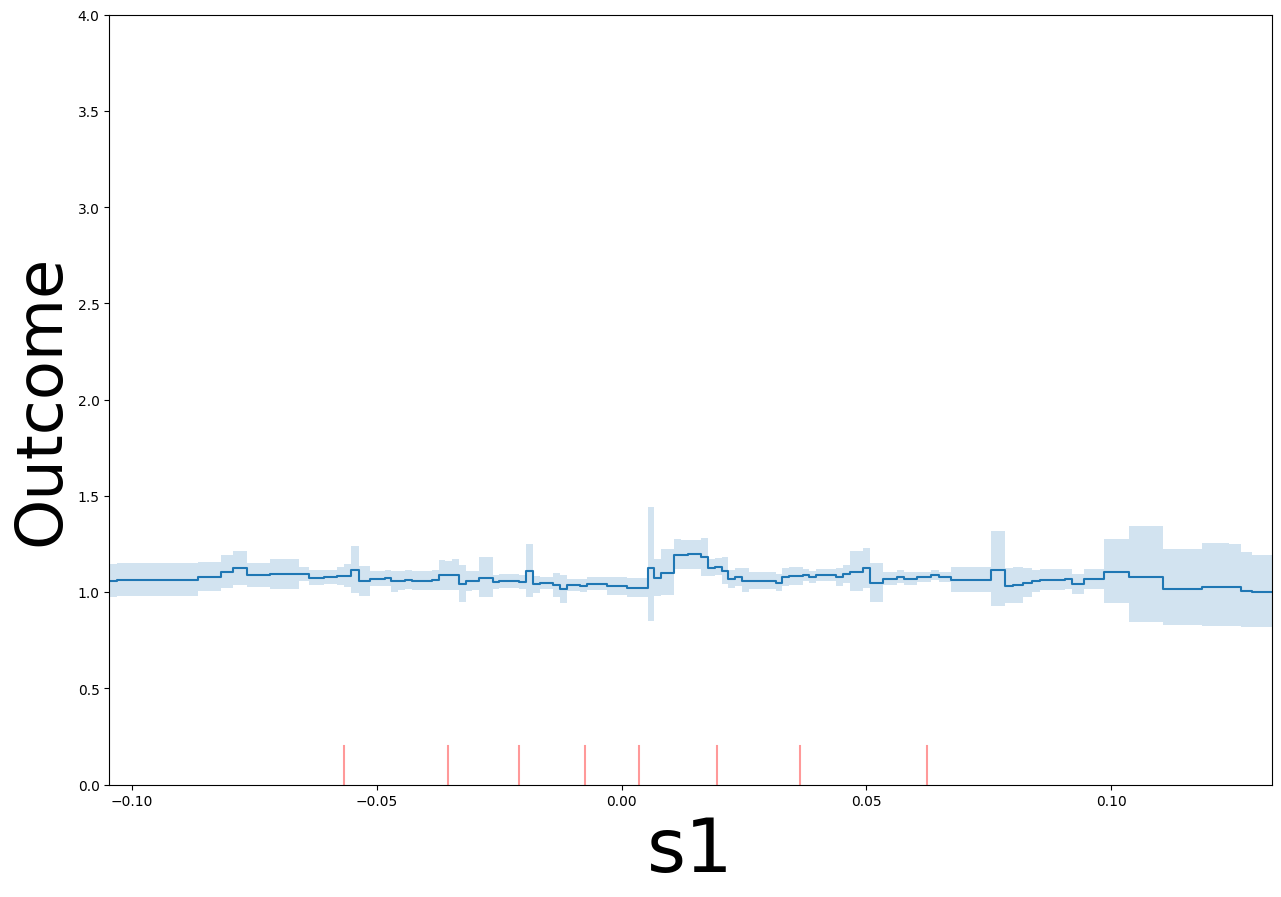

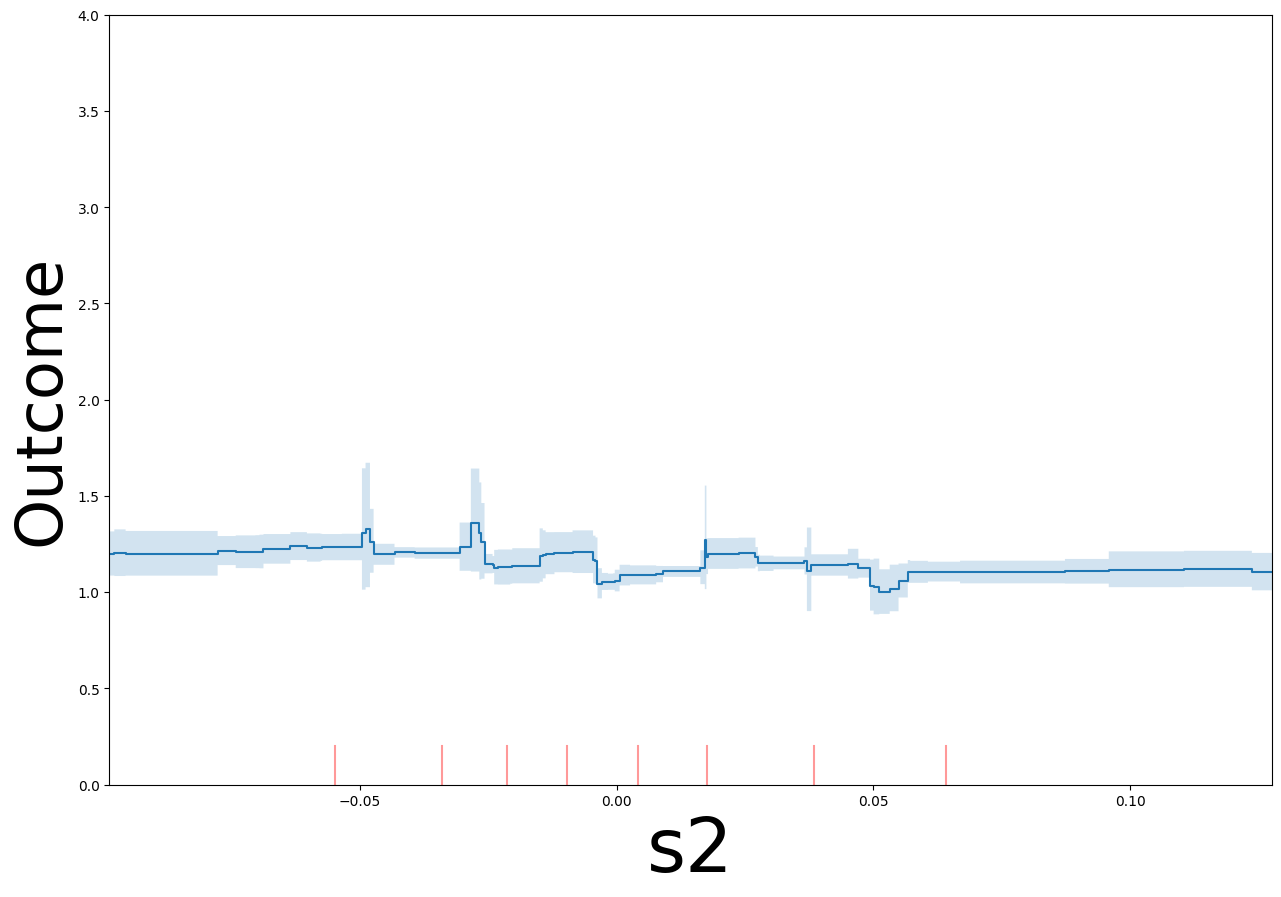

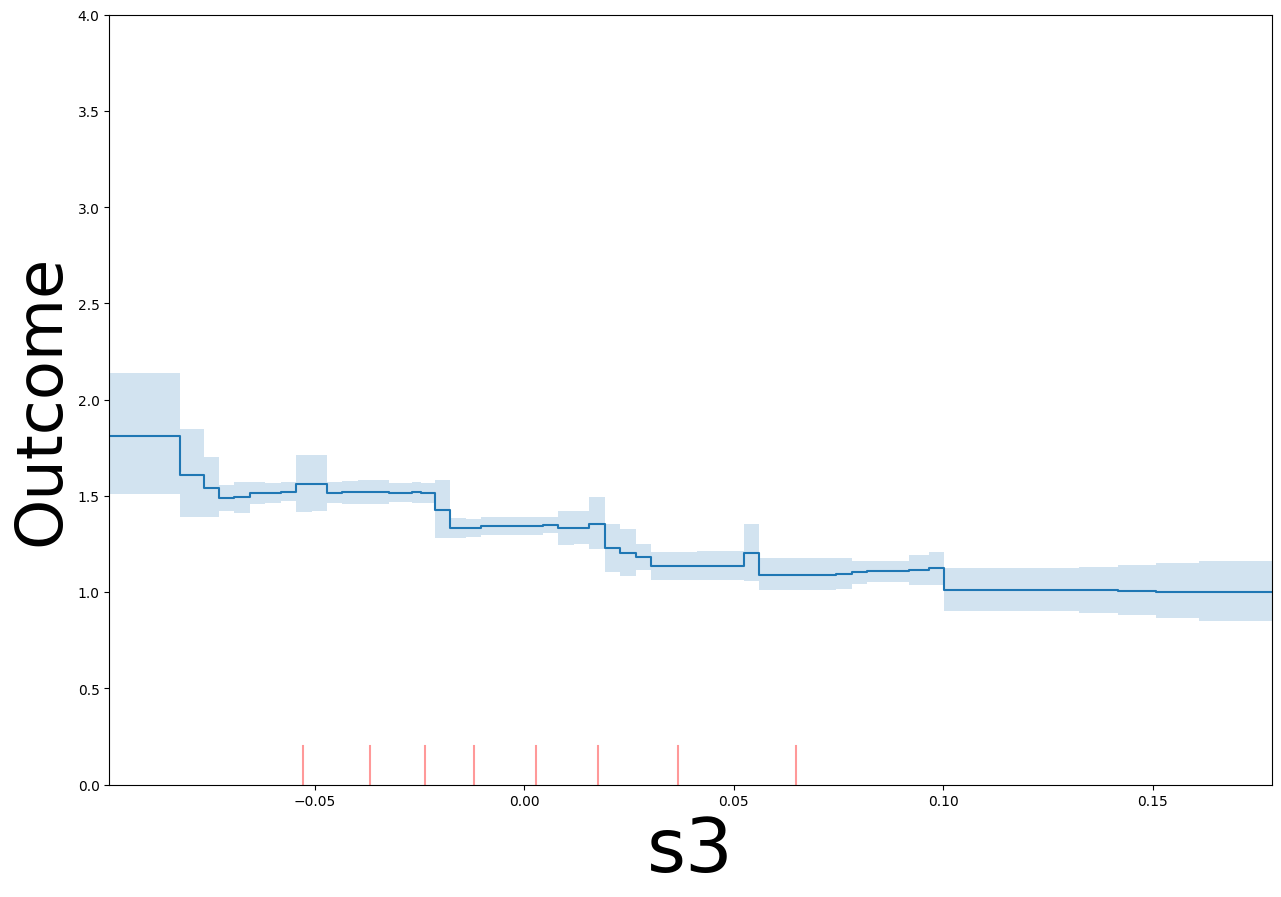

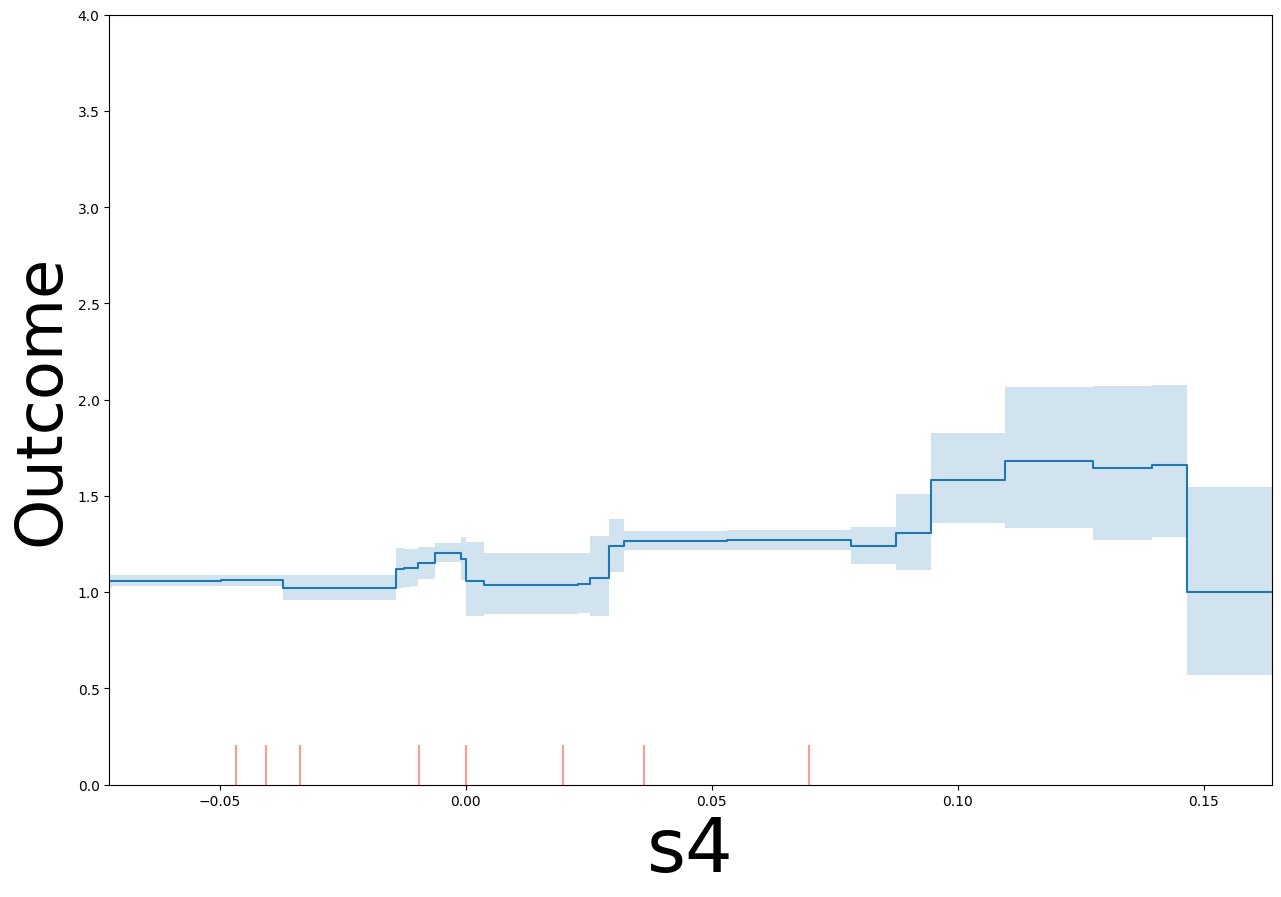

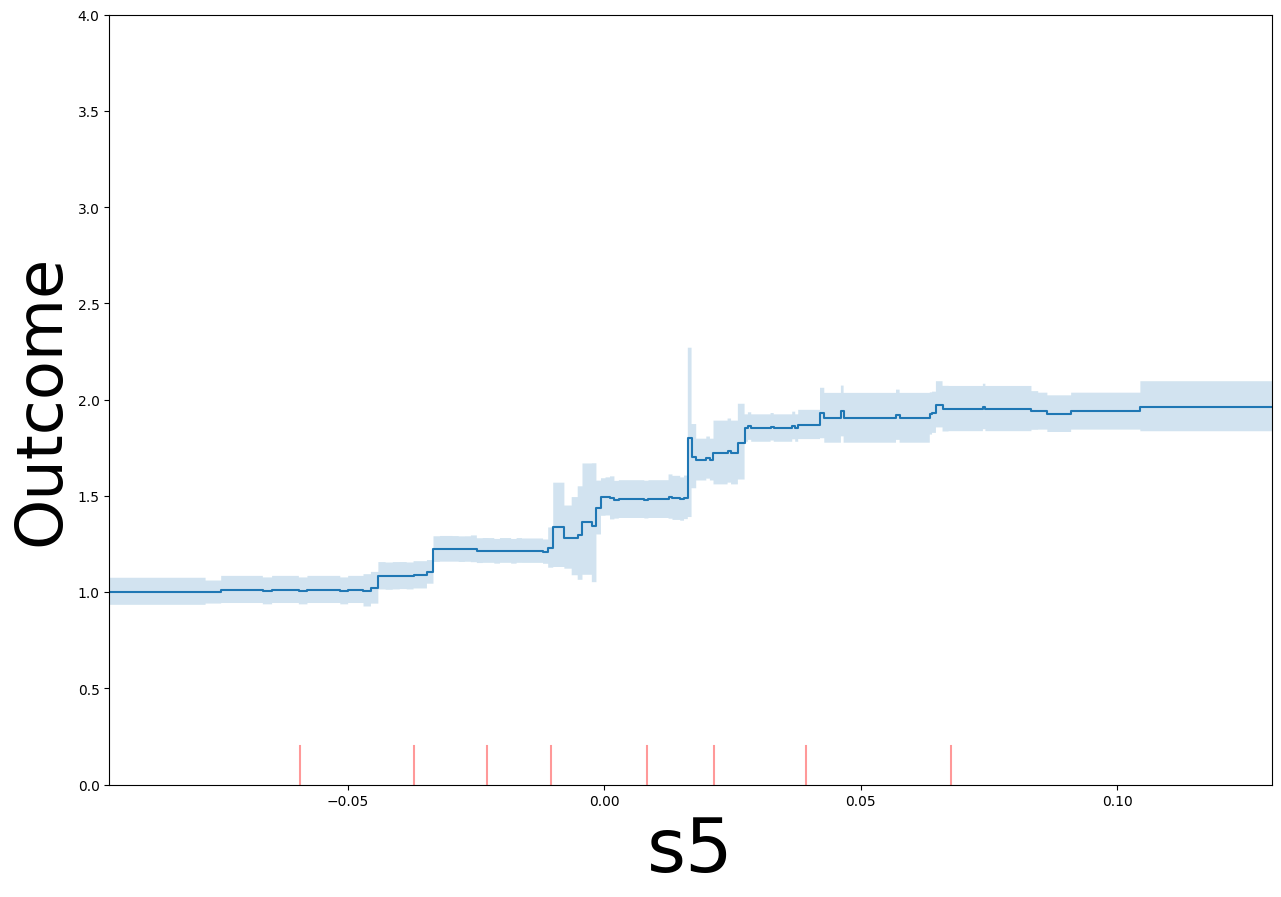

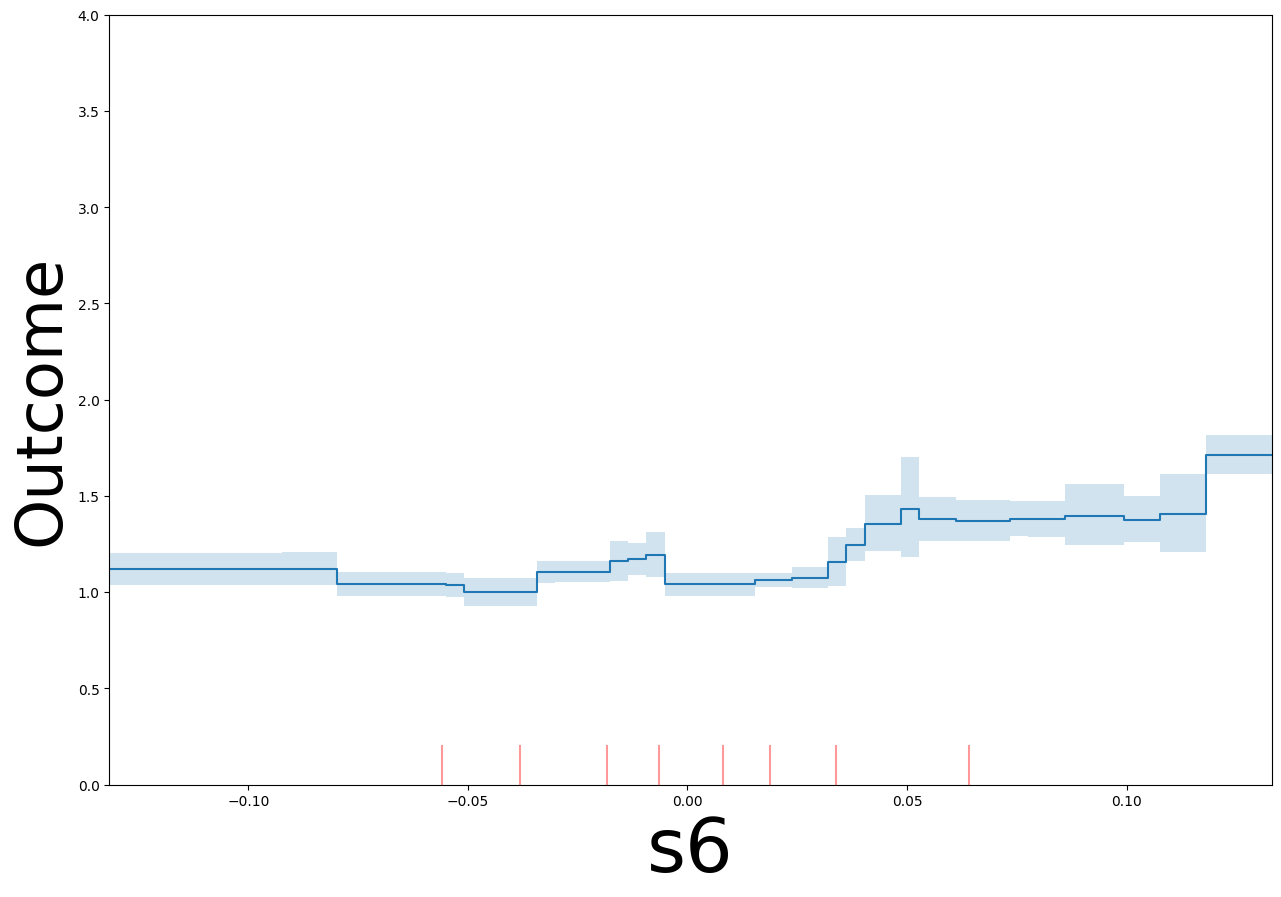

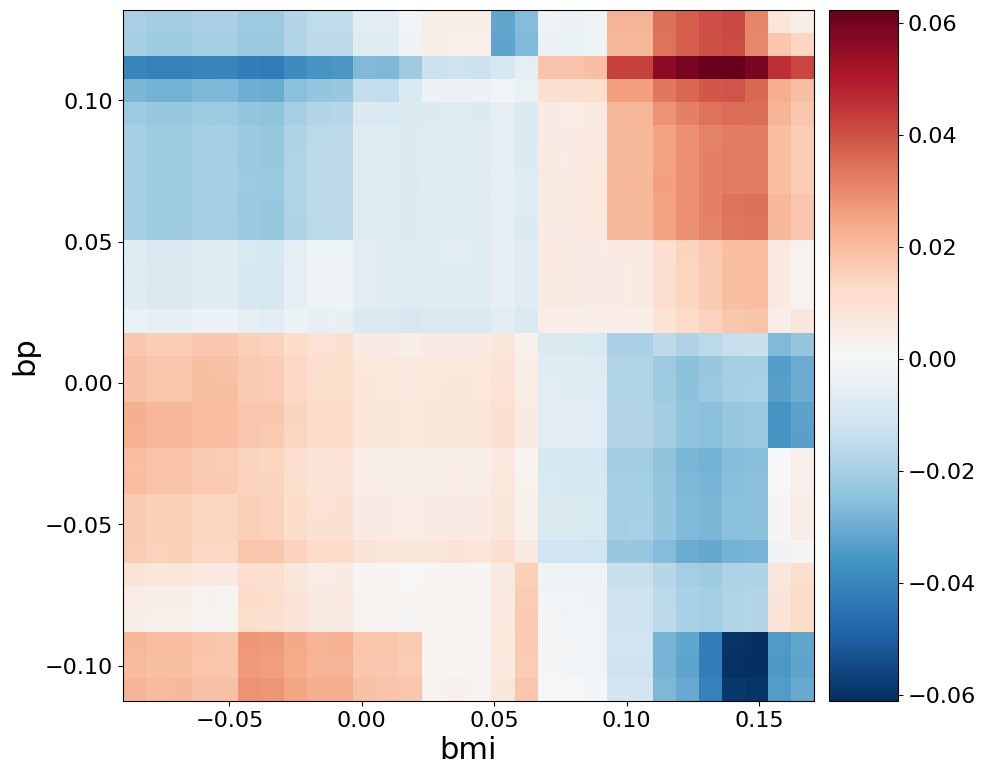

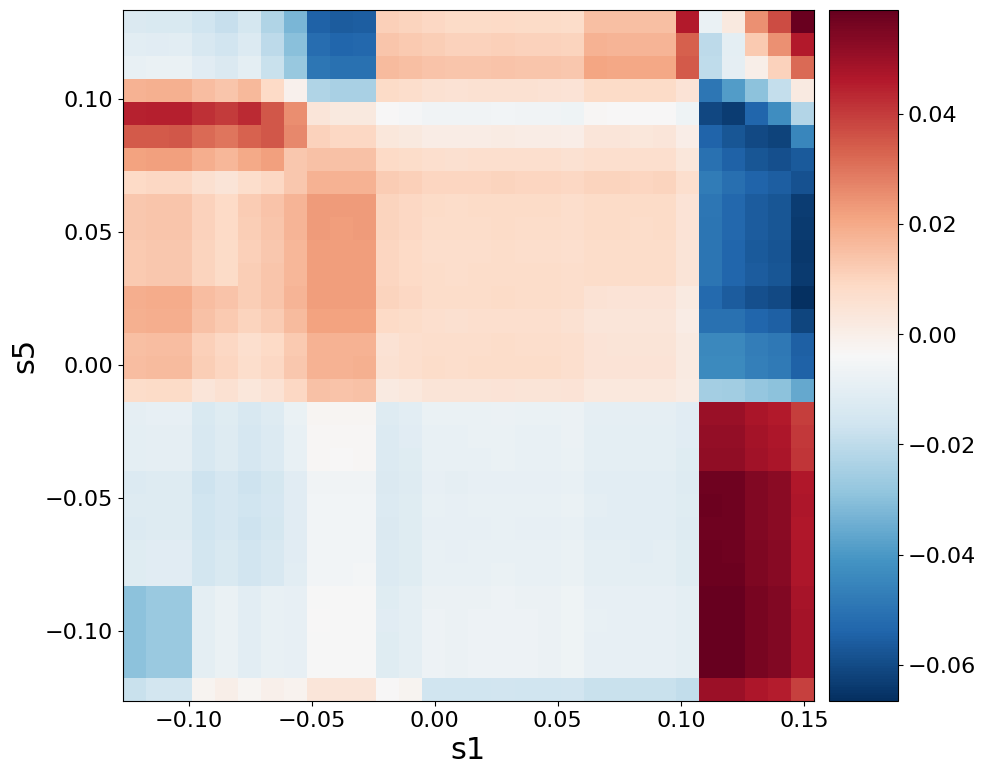

In [3]:
# Purify any learned interactions.
# Purification requires installing https://github.com/blengerich/gam_purification by:
# pip install git+https://github.com/blengerich/gam_purification.git
# See paper http://proceedings.mlr.press/v108/lengerich20a.html for more details
from ebm_utils.analysis.purify_utils import purify, purify_and_update
purify_and_update(ebm, use_density=True, dataset_name="toy", move_name="smoothed",
                  X_train=X, X_means=np.mean(X, axis=0), X_stds=np.std(X, axis=0),
                  laplace=10, should_transpose=False)


# Plotting Hleper
from ebm_utils.analysis.plot_utils import plot_all_features, plot_importances
plot_importances(ebm, 10)
plot_all_features(
    ebm.explain_global(), X,
    bool_mpl_style=True, bool_figsize=(12, 12),
    ylabel='Outcome',
    classification=False,
    ylims={x: [0, 4] for x in X.columns}
)